In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader,Dataset
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
cd/content/gdrive/MyDrive/deeplearningbro/deeplearningbro/pytorch

/content/gdrive/MyDrive/deeplearningbro/deeplearningbro/pytorch


In [34]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader = DataLoader(trainset,batch_size = 8, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testloader = DataLoader(trainset,batch_size = 8, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


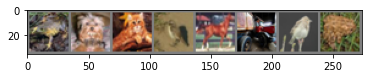

frog  dog   cat   bird  horse truck bird  frog 


In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
batch_size = 8
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(f'{device} is available.')

cuda:0 is available.


In [11]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool1 = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.pool2 = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,10)
  
  def forward(self,x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    return x

net = Net().to(device)

In [12]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=1e-3,momentum=0.9)
optimizer2 = optim.Adam(net.parameters(),lr=0.001,weight_decay=1e-7)

In [37]:
loss_ = []
n = len(trainloader)

for epoch in range(10):
  running_loss = 0.0
  for i,data in enumerate(trainloader):
    inputs,labels = data[0].to(device), data[1].to(device)
    
    optimizer.zero_grad()
    
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  loss_.append(running_loss/n)
  print('[%d] loss: %.3f' %(epoch+1,running_loss/len(trainloader)))

print('Finished Training')

[1] loss: 0.866
[2] loss: 0.866
[3] loss: 0.866
[4] loss: 0.866
[5] loss: 0.866
[6] loss: 0.866
[7] loss: 0.866
[8] loss: 0.866
[9] loss: 0.866
[10] loss: 0.866
Finished Training


In [32]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(),PATH)

In [33]:
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [39]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images,labels = data[0].to(device), data[1].to(device)
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct/total))

Accuracy of the network on the 10000 test images: 69 %
